<a href="https://colab.research.google.com/github/Tina-Mulu/KNN-and-Naive-Bayes-Theorem-/blob/main/Naive_Bayes_Classifier_to_determine_if_a_text_is_a_spam_or_not.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Defining the question

a). Specifying the Data Analytic Question

Using Naive Bayes Classifier determin e if an email is a spam or not

Using Naive Bayes Classifier to detremine if a message is a spam or not

b) Define Metrics for success

use naive bayes classifier in your analysis. split the dataset into 80-20, 70-30, and 60-40 to determine which split brings out the best model accuracy.

c) Understanding the context

d) Recording the Experimental Design

Naive bayes classifier will be used. later Normalize the data to see if there are any changes on the accuracy level

e) Data Relevance


The datasets we are using in our research are relevant as it contains information pertaining to different variables that would generally influence the prediction of whether an email is spam or not.In general the variables selected for the dataset present a high degree of data relevance.

# 2. Reading the Data

In [33]:
#importing the Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score

In [34]:

df = pd.read_csv('/content/spambase (1).data')
df.head()

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,0.7,0.64.2,0.8,0.9,0.10,0.32.1,0.11,1.29,1.93,0.12,0.96,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32.2,0.33,0.34,0.35,0.36,0.37,0.38,0.39,0.40,0.41,0.42,0.778,0.43,0.44,3.756,61,278,1
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1


In [35]:
with open('/content/spambase.names') as f:
    print(f.read())

| SPAM E-MAIL DATABASE ATTRIBUTES (in .names format)
|
| 48 continuous real [0,100] attributes of type word_freq_WORD 
| = percentage of words in the e-mail that match WORD,
| i.e. 100 * (number of times the WORD appears in the e-mail) / 
| total number of words in e-mail.  A "word" in this case is any 
| string of alphanumeric characters bounded by non-alphanumeric 
| characters or end-of-string.
|
| 6 continuous real [0,100] attributes of type char_freq_CHAR
| = percentage of characters in the e-mail that match CHAR,
| i.e. 100 * (number of CHAR occurences) / total characters in e-mail
|
| 1 continuous real [1,...] attribute of type capital_run_length_average
| = average length of uninterrupted sequences of capital letters
|
| 1 continuous integer [1,...] attribute of type capital_run_length_longest
| = length of longest uninterrupted sequence of capital letters
|
| 1 continuous integer [1,...] attribute of type capital_run_length_total
| = sum of length of uninterrupted sequences of

In [36]:

names = ['word_freq_make','word_freq_address','word_freq_all','word_freq_3d','word_freq_our','word_freq_over',
       'word_freq_remove','word_freq_internet','word_freq_order','word_freq_mail','word_freq_receive',
       'word_freq_will','word_freq_people','word_freq_report','word_freq_addresses','word_freq_free',
       'word_freq_business','word_freq_email','word_freq_you','word_freq_credit','word_freq_your',
       'word_freq_font','word_freq_000','word_freq_money','word_freq_hp','word_freq_hpl',
       'word_freq_george','word_freq_650','word_freq_lab','word_freq_labs','word_freq_telnet',
       'word_freq_857','word_freq_data','word_freq_415','word_freq_85','word_freq_technology',
       'word_freq_1999','word_freq_parts','word_freq_pm','word_freq_direct','word_freq_cs',
       'word_freq_meeting','word_freq_original','word_freq_project','word_freq_re','word_freq_edu',
       'word_freq_table','word_freq_conference','char_freq_;','char_freq_(','char_freq_[',
       'char_freq_!','char_freq_$','char_freq_#','capital_run_length_average','capital_run_length_longest',
       'capital_run_length_total','Spam']

In [37]:
data  = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data',names = names)
data.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,Spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93,0.00,0.96,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


# 3. Checking the data

In [38]:
data.shape

(4601, 58)

In [39]:
# checking the bottom data
data.tail()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,Spam
4596,0.31,0.0,0.62,0.0,0.00,0.31,0.0,0.0,0.0,0.0,0.0,1.88,0.00,0.0,0.0,0.0,0.0,0.0,0.62,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.31,0.31,0.31,0.0,0.0,0.000,0.232,0.0,0.000,0.0,0.0,1.142,3,88,0
4597,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,6.00,0.0,2.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,2.00,0.0,0.0,0.000,0.000,0.0,0.353,0.0,0.0,1.555,4,14,0
4598,0.30,0.0,0.30,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,1.80,0.30,0.0,0.0,0.0,0.0,0.9,1.50,0.0,0.30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,1.20,0.0,0.0,0.102,0.718,0.0,0.000,0.0,0.0,1.404,6,118,0
4599,0.96,0.0,0.00,0.0,0.32,0.00,0.0,0.0,0.0,0.0,0.0,0.32,0.00,0.0,0.0,0.0,0.0,0.0,1.93,0.0,0.32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.32,0.00,0.32,0.0,0.0,0.000,0.057,0.0,0.000,0.0,0.0,1.147,5,78,0
4600,0.00,0.0,0.65,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.65,0.0,0.0,0.0,0.0,0.0,4.60,0.0,0.65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1.97,0.65,0.0,0.0,0.000,0.000,0.0,0.125,0.0,0.0,1.250,5,40,0


In [40]:
data.dtypes

word_freq_make                float64
word_freq_address             float64
word_freq_all                 float64
word_freq_3d                  float64
word_freq_our                 float64
word_freq_over                float64
word_freq_remove              float64
word_freq_internet            float64
word_freq_order               float64
word_freq_mail                float64
word_freq_receive             float64
word_freq_will                float64
word_freq_people              float64
word_freq_report              float64
word_freq_addresses           float64
word_freq_free                float64
word_freq_business            float64
word_freq_email               float64
word_freq_you                 float64
word_freq_credit              float64
word_freq_your                float64
word_freq_font                float64
word_freq_000                 float64
word_freq_money               float64
word_freq_hp                  float64
word_freq_hpl                 float64
word_freq_ge

# Tidying the dataset

In [41]:
# checking for null values
data.isnull().sum().any()

False

In [42]:
# checking for duplicates
data.duplicated().sum()

391

In [43]:
data.drop_duplicates()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,Spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93,0.00,0.96,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.00,0.06,0.06,0.0,0.0,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,0.00,1.88,0.00,0.00,0.00,0.00,0.00,0.00,0.62,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.31,0.31,0.31,0.0,0.0,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,6.00,0.00,2.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,2.00,0.0,0.0,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.80,0.30,0.00,0.00,0.00,0.00,0.90,1.50,0.00,0.30,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,1.20,0.0,0.0,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.32,0.00,0.00,0.00,0.00,0.00,0.00,1.93,0.00,0.32,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.32,0.00,0.32,0.0,0.0,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


# 5. Explaratory Data Analysis

In [44]:
# frequencey of spam data
data['Spam'].value_counts()

0    2788
1    1813
Name: Spam, dtype: int64

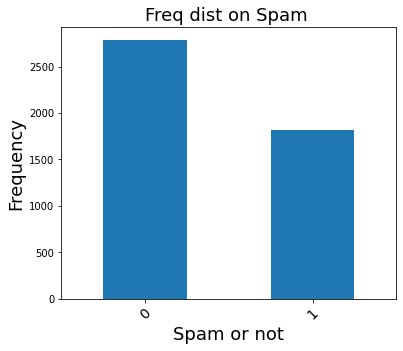

In [45]:
# bar graph on spam data

data['Spam'].value_counts().plot.bar(figsize=(6,5),grid=False)

plt.title('Freq dist on Spam ',size=18)
plt.xlabel('Spam or not',size=18)
plt.xticks(fontsize=14,rotation=45)
plt.ylabel('Frequency',size=18)
plt.show()

In [46]:
data.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,Spam
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,0.059824,0.541702,0.093930,0.058626,0.049205,0.248848,0.142586,0.184745,1.662100,0.085577,0.809761,0.121202,0.101645,0.094269,0.549504,0.265384,0.767305,0.124845,0.098915,0.102852,0.064753,0.047048,0.097229,0.047835,0.105412,0.097477,0.136953,0.013201,0.078629,0.064834,0.043667,0.132339,0.046099,0.079196,0.301224,0.179824,0.005444,0.031869,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,0.201545,0.861698,0.301036,0.335184,0.258843,0.825792,0.444055,0.531122,1.775481,0.509767,1.200810,1.025756,0.350286,0.442636,1.671349,0.886955,3.367292,0.538576,0.593327,0.456682,0.403393,0.328559,0.555907,0.329445,0.532260,0.402623,0.423451,0.220651,0.434672,0.349916,0.361205,0.766819,0.223812,0.621976,1.011687,0.911119,0.076274,0.285735,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.310000,0.000000,0.220000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00

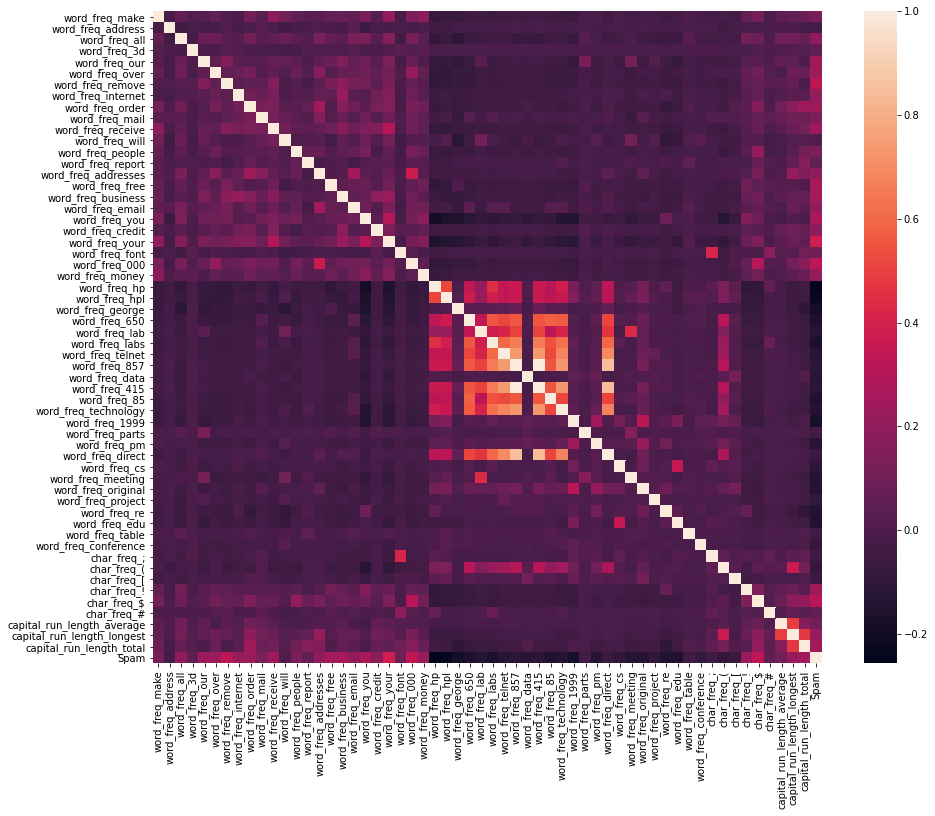

In [47]:
# correlation heatmap
fig, ax = plt.subplots(figsize=(15,12))        
sns.heatmap(data.corr(),annot=False,ax=ax)
plt.show()

# **Implimenting the Solution**

**80-20 split **

In [48]:
# Load libraries and datasets to be used in this example
#
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

In [49]:
# Splitting the dataset
X = data.drop(['Spam'], axis=1)
y = data['Spam']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=6) 

In [50]:
# Training our model
# 
clf = GaussianNB()  
model = clf.fit(X_train, y_train) 

In [51]:
# Predicting our test predictors
predicted = model.predict(X_test)
print(np.mean(predicted == y_test))

0.8154180238870793


In [52]:
print(confusion_matrix(y_test, predicted))

[[403 156]
 [ 14 348]]


The model accuracy using the 80-20 split is 81.54%.

**70-30 Split**

In [25]:
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=6) 

In [26]:
# Training our model
# 
clf = GaussianNB()  
model = clf.fit(X_train, y_train) 

In [27]:
# Predicting our test predictors
predicted = model.predict(X_test)
print(np.mean(predicted == y_test))

0.8233164373642288


In [28]:
print(confusion_matrix(y_test, predicted))

[[619 227]
 [ 17 518]]


the model accuracy improved t0 82.33% on a 70-30 split.

**60-40 split**

In [29]:
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=6) 

In [30]:
# Training our model
# 
clf = GaussianNB()  
model = clf.fit(X_train, y_train) 

In [31]:
# Predicting our test predictors
predicted = model.predict(X_test)
print(np.mean(predicted == y_test))

0.8288973384030418


In [32]:
print(confusion_matrix(y_test, predicted))

[[816 289]
 [ 26 710]]


the model improved to a 82.88% accuracy level on a 60-40 split. the more we split the model the more the accuracy level. so far the 60-40 split brings the best accuracy hence its the best model to use on predicting if a text is a spam or not.

# Challenging the solution


We can try to challenge our solution and see how our model will perform by normalizing our dataset

In [53]:
# Load libraries
from sklearn.preprocessing import Normalizer

# Create normalizer
normalizer = Normalizer(norm='l2')

# Transform feature matrix
normalizer.transform(X)

array([[0.00000000e+00, 2.24834975e-03, 2.24834975e-03, ...,
        1.31950026e-02, 2.14295835e-01, 9.76626921e-01],
       [2.03297105e-04, 2.71062806e-04, 4.84040726e-04, ...,
        4.95076854e-03, 9.77762266e-02, 9.95187732e-01],
       [2.59683978e-05, 0.00000000e+00, 3.07292708e-04, ...,
        4.25059392e-03, 2.09911216e-01, 9.77710178e-01],
       ...,
       [2.53812946e-03, 0.00000000e+00, 2.53812946e-03, ...,
        1.18784459e-02, 5.07625892e-02, 9.98330921e-01],
       [1.22759766e-02, 0.00000000e+00, 0.00000000e+00, ...,
        1.46672345e-02, 6.39373781e-02, 9.97423098e-01],
       [0.00000000e+00, 0.00000000e+00, 1.59858723e-02, ...,
        3.07420620e-02, 1.22968248e-01, 9.83745986e-01]])

In [54]:
# Splitting our data into a training set and a test set
# 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=6)

In [56]:

# Training our model
# 

clf = GaussianNB()  
model = clf.fit(X_train, y_train)

In [57]:
# Predicting our test predictors
predicted = model.predict(X_test)
print(np.mean(predicted == y_test))

0.8288973384030418


In [59]:
print(confusion_matrix(y_test, predicted))

[[816 289]
 [ 26 710]]


The model accuracy from the 60-40 split has not changes and also the confusion matrix has remained the same. There was no neeed of normalizing the data because it seems to be already normal.

Conclusions

1. the 60-40 split brought the best model accuracy for our data set at 82.88%
2. the data seemed to be normally distributed alreasy
3. we had the correct data set to use for our analysis.